In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import PIL # actually from the 'pillow' package

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, MaxPooling2D, Flatten, Dense, Rescaling, Dropout, BatchNormalization, LeakyReLU, Activation, LayerNormalization, GaussianNoise
from tensorflow.keras.utils import image_dataset_from_directory, load_img
from tensorflow.keras.models import load_model
import os

# changes added by moi for task 5 is not over fitted
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, ModelCheckpoint
from tensorflow.python.data.experimental.ops.distribute import batch_sizes_for_worker
import tensorflow as tf
from tensorflow import data as tf_data


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.backend)

2.14.1
<module 'keras.api._v2.keras.backend' from 'C:\\Users\\jorgeblx\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\keras\\api\\_v2\\keras\\backend\\__init__.py'>


## Task 5: Individual Task

You have now trained your first CNN, congratulations! Now experiment with the model topology there are no restrictions on layer types nor how many. Change hyperparameters and use [augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) to see if you can get towards 70% accuracy without overfitting.

This is quite a hard problem because you have a limited amount of data. However what is important is that you make rational decisions that will move you in that direction. The advise is to make incremental changes to the model and test it. Do not waste too much time trainng the model try 50-100 epochs per experiment.

**Remember do not submit this task to gitlab nor comment on the forum.**

In [3]:
# I added the random code change from Task 4 and then my from scratch solution as the randomness of the code from Task 4 was driving me crazy
#
# Very interesting to see how my from scratch solution has yielded a better result than the code change to Task 4 :)

In [4]:
epochs = 50
batch_size = 32

# define a new sequencial model
net = Sequential()

# add the layers
net.add(Input(shape=(64, 64, 3)))                               # input 64x64 image with 3 layers
net.add(Rescaling(1./255))

net.add(tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2))
net.add(tf.keras.layers.RandomFlip("horizontal_and_vertical"))

# create 32 windows / filter = number of learnable feature maps ( each filter detects a specific feature )
net.add(Conv2D(32, (3, 3), activation='relu'))

net.add(BatchNormalization())                        # normalise the data
net.add(MaxPooling2D(pool_size=(2, 2), strides=2))
net.add(Dropout(0.25))                               # stop over fitting - the 0.25 was picked as part the “trial and error process"
net.add(Conv2D(32, (3, 3), activation='relu'))
net.add(MaxPooling2D(pool_size=(2, 2), strides=2))
net.add(Dropout(0.25))                               # stop over fitting - the 0.25 was picked as part the “trial and error process"
net.add(Flatten())                                   # Add the flattening layer
net.add(Dense(128, activation='relu'))               # The second layer was added at random
net.add(Dense(128, activation='relu'))
net.add(BatchNormalization())                        # normalise
net.add(Dropout(0.5))                                # add dropout to prevent overfitting
net.add(Dense(64, activation='relu'))
net.add(Dropout(0.3))
net.add(Dense(1, activation='sigmoid'))              # final 1 neuron layer

# call the optimizer via code and not string "adam"
net.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Params # -- are the weights incl. the bias weights
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 random_zoom (RandomZoom)    (None, 64, 64, 3)         0         
                                                                 
 random_flip (RandomFlip)    (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                     

In [5]:
train_set = image_dataset_from_directory('data/catdog/training_set/',
                                                 image_size = (64, 64),
                                                 batch_size = batch_size,
                                                 shuffle = True)

# Prefetching samples in GPU memory helps maximize GPU utilization.
train_set = train_set.prefetch(tf_data.AUTOTUNE)

test_set = image_dataset_from_directory('data/catdog/test_set/',
                                            image_size = (64, 64),
                                            batch_size = batch_size,
                                            shuffle = True)

# Prefetching samples in GPU memory helps maximize GPU utilization.
test_set = test_set.prefetch(tf_data.AUTOTUNE)

Found 2404 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


Epoch 1/50
76/76 [==============================] - 14s 150ms/step - loss: 0.7824 - accuracy: 0.5524 - val_loss: 0.7299 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
76/76 [==============================] - 11s 140ms/step - loss: 0.7069 - accuracy: 0.5853 - val_loss: 0.8049 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/50
76/76 [==============================] - 12s 157ms/step - loss: 0.6742 - accuracy: 0.6190 - val_loss: 0.7429 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
76/76 [==============================] - 14s 177ms/step - loss: 0.6569 - accuracy: 0.6273 - val_loss: 0.9095 - val_accuracy: 0.4980 - lr: 0.0010
Epoch 5/50
76/76 [==============================] - 12s 152ms/step - loss: 0.6365 - accuracy: 0.6327 - val_loss: 0.8325 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/50
76/76 [==============================] - 12s 155ms/step - loss: 0.6163 - accuracy: 0.6705 - val_loss: 0.7085 - val_accuracy: 0.5440 - lr: 0.0010
Epoch 7/50
76/76 [==============================] - 12s 150ms/st

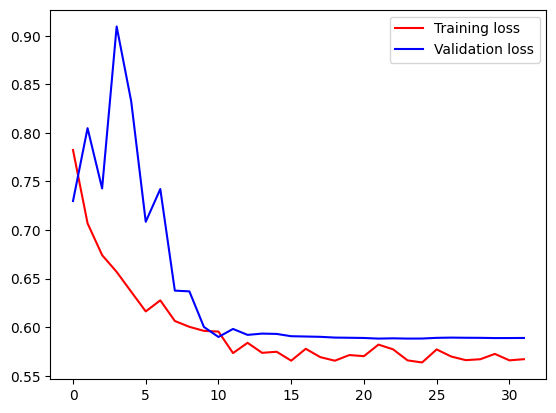

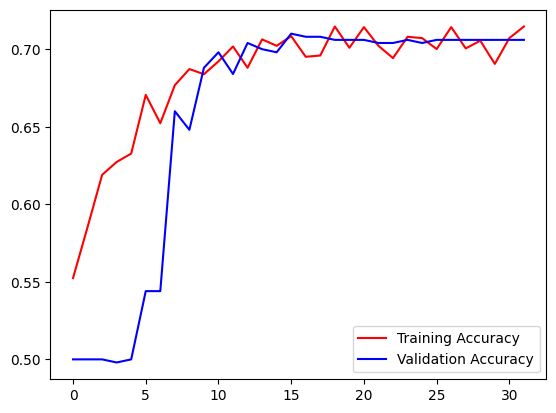

In [6]:
def step_decay(epoch, lr):
    return lr * (0.5 ** np.floor((1 + epoch) / 10))

# Callbacks for learning rate reduction on plateau
# patience = when to stop if the value of 'accuracy' doesn't change - went for this parameter at random
# min_lr = 0.001 - standard value
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# stop the second the validation loss stops improving to stop over fitting
# patience = when to stop if the value of 'accuracy' doesn't change - went for this parameter at random
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# make the learning rate learn
scheduler_lr = LearningRateScheduler(step_decay)

# the run takes 4m 38: sec  ->  72.40 %
hist = net.fit(
    train_set,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=test_set,
    verbose=1, # control the output
    callbacks=[reduce_lr, early_stopping, scheduler_lr] # callbacks are used to call the 3 strategies want to execute reduce_lr /  early_stopping /  scheduler_lr
)

# ---------------------------------------------------------

_, acc = net.evaluate(test_set, steps=len(test_set), verbose=0)
print('Accuracy: > %.3f' % (acc * 100.0))

# ---------------------------------------------------------

plt.plot(hist.history['loss'], c='r', label='Training loss')
plt.plot(hist.history['val_loss'], c='b', label='Validation loss')
plt.legend()
plt.show()

#Learning Curves

#Converging Curves: If the training and validation loss curves converge, it indicates good generalization.
#Overfitting:       If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting.
#Underfitting:      If both curves remain high and do not decrease significantly, it indicates underfitting.

plt.plot(hist.history['accuracy'], c='r', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], c='b', label='Validation Accuracy')
plt.legend()
plt.show()

In [7]:
# As part of the changes to the code from Task 4, I played with training each layer in isolation, but that failed :

# bad strategy
# train model layer by layer
#for layer in net.layers:
#    layer.trainable = True
#    net.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
#    hist = net.fit(
#    train_set,
#    epochs=epochs,
#    batch_size=batch_size,
#    validation_data=test_set,
#    callbacks=[reduce_lr, early_stopping, scheduler_lr]
#)
#    layer.trainable = False

#plt.plot(hist.history['loss'], c='r', label='Training loss')
#plt.plot(hist.history['val_loss'], c='b', label='Validation loss')
#plt.legend()
#plt.show()

#plt.plot(hist.history['accuracy'],c='r', label='Training Accuracy')
#plt.plot(hist.history['val_accuracy'],c='b', label='Validation Accuracy')
#plt.legend()
#plt.show()

1/1 [==============================] - 0s 211ms/step


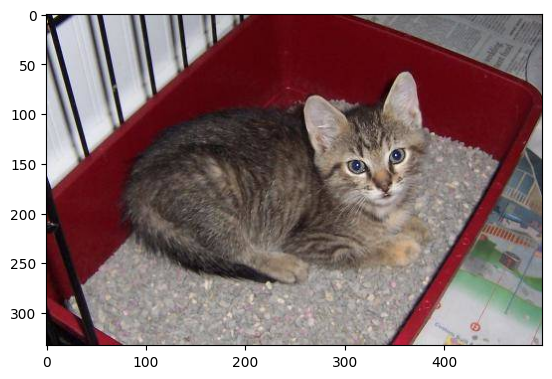

cat
1/1 [==============================] - 0s 44ms/step


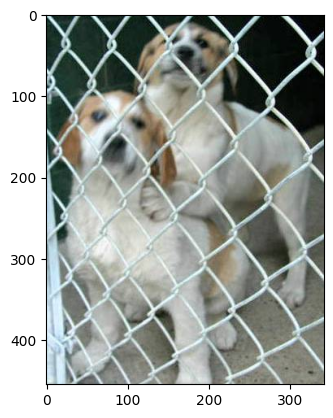

dog
1/1 [==============================] - 0s 38ms/step


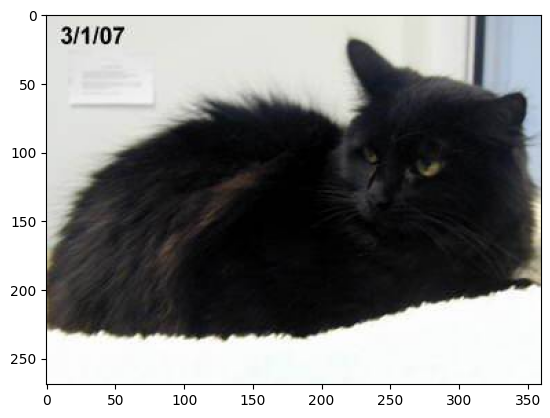

cat
1/1 [==============================] - 0s 39ms/step


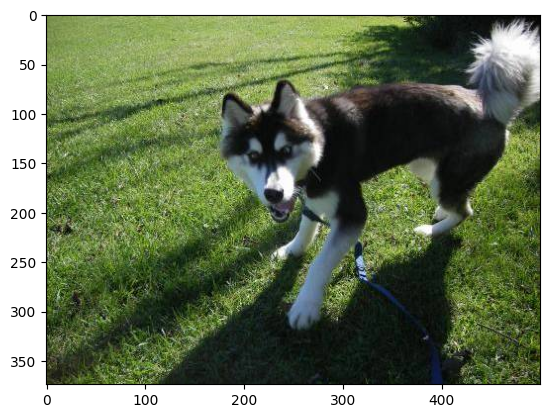

dog


In [8]:
def classifyimage(imagepath,model):
    test_image = load_img(imagepath, target_size = (64, 64))
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] > 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'

    img = mpimg.imread(imagepath)
    plt.imshow(img)
    plt.show()
    print(prediction)

classifyimage('data/catdog/cat_or_dog_1.jpg',net)
classifyimage('data/catdog/cat_or_dog_2.jpg',net)
classifyimage('data/catdog/cat_or_dog_3.jpg',net)
classifyimage('data/catdog/cat_or_dog_4.jpg',net)

In [53]:
# save the weights
#net.save_weights('task5_weights.h5')

In [9]:
# After I got to 72.40 %, I was not very happy as it felt it was a bit random and the process was all over the place and each run would take forever. So I started looking at CNN architectures and I settled on the VGG variation
# as I started from scratch

In [99]:
epochs = 50
batch_size = 32

# data augmentation function to run on the sample input images
data_augmentation_train = tf.keras.Sequential([
    # the order does make a difference !!!!!
    #tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    #tf.keras.layers.RandomRotation(0.2),
    #tf.keras.layers.RandomZoom(0.2),

    # the order does make a difference !!!!!
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomFlip("horizontal")
])

In [82]:
# Apply `data_augmentation` to the training images
train_dataset = image_dataset_from_directory('data/catdog/training_set/', image_size = (64, 64), batch_size = batch_size, shuffle = True)
augmented_train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation_train(x, training=True), y),
    num_parallel_calls=tf_data.AUTOTUNE, # nice way to speed up things - before it was taking 4 ever
)

# Prefetching samples in GPU memory helps maximize GPU utilization to speed up the fit , as it was taking forever
augmented_train_dataset = augmented_train_dataset.prefetch(tf_data.AUTOTUNE)

# I tried to append the "train_dataset" to the "augmented_train_dataset" just to increase the training dataset
# it did increase the accuracy, but in the graphs below there was a gap in the chart as there was more train data than test data
# so I had to rollback that change, but it is a valid strategy !!!

# we do nothing to the test dataset
test_dataset = image_dataset_from_directory('data/catdog/test_set/', image_size = (64, 64), batch_size = batch_size, shuffle = True)
augmented_test_dataset = test_dataset

Found 2404 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [12]:
# show me the images just augmented
#plt.figure(figsize=(10, 10))
#for images, labels in train_dataset.take(1):
#  for i in range(9):
#    augmented_images = data_augmentation_train(images)
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(augmented_images[i])
#    plt.axis("off")

In [13]:
# another CNN architecture that looks very promising :)
# the laptop could not handle it, so I had to leave it here for my ref for the future

#def dog_cat_xception_model():

    #      https://towardsdatascience.com/xception-from-scratch-using-tensorflow-even-better-than-inception-940fb231ced9

    # ...

#    return dog_cat_model

In [100]:
def dog_cat_vgg_model():

    # Different CNN Architectures: https://medium.com/@navarai/unveiling-the-diversity-a-comprehensive-guide-to-types-of-cnn-architectures-9d70da0b4521

    dog_cat_model = Sequential()

    # instance vgg model layer
    dog_cat_model.add(Input(shape=(64, 64, 3)))  # input 64x64 image with 3 layers
    dog_cat_model.add(Rescaling(1./255))

    # he uniform is designed to keep the scale of the gradients roughly the same in all layers.

    # the variation of the layers below are taken from the vgg CNN Architecture, it feels less random

    # each layer was added at a time, with the above GPU change I spent less time waiting (positive step)

    # the paper on VGG uses 'use_bias = False' so left it as it is
    dog_cat_model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_uniform', strides=2,  padding = 'same'))
    dog_cat_model.add(BatchNormalization()) # this is added to stop overfitting
    dog_cat_model.add(Activation('relu'))   # I want the activation to happen after 'BatchNormalization'
    dog_cat_model.add(MaxPooling2D(pool_size=3, strides=2))

    dog_cat_model.add(GaussianNoise(0.1)) # add noise - this reduced the gap between the blue and red lines and for the second image it gave me dogdog :)

    dog_cat_model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_uniform', strides=1))
    dog_cat_model.add(BatchNormalization()) # this is added to stop overfitting
    dog_cat_model.add(Activation('relu'))   # I want the activation to happen after 'BatchNormalization'
    dog_cat_model.add(MaxPooling2D(pool_size=3, strides=2))

    # I tried to the 3rd VGG layer, it reduced the accuracy so leaving it with 2 VGG layers
    # and for the second image I only got 'dog' and not 'dogdog'

    #dog_cat_model.add(GaussianNoise(0.1)) # add noise - this reduced the gap between the blue and red lines and for the second image it gave me dogdog :)

    dog_cat_model.add(Dropout(0.25)) # this value was found by running more than 1 loop

    dog_cat_model.add(Flatten())
    dog_cat_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    dog_cat_model.add(Dropout(0.5)) #dog_cat_model.add(LayerNormalization()) # this makes a big diff than dog_cat_model.add(Dropout(0.5))
    dog_cat_model.add(Dense(1, activation='sigmoid'))

    dog_cat_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return dog_cat_model

In [101]:
# stop the second the validation loss stops improving to stop over fitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True, verbose=1)

# learning rate reduction on plateau
lr_reduce_on_plateau = ReduceLROnPlateau(factor=0.2, patience=10, min_lr=0.001)

# the default values left as they - update the lr after epoch
def step_decay(epoch, lr):
    return lr * (0.5 ** np.floor((1 + epoch) / 10))

# make the learning rate learn
lr_scheduler = LearningRateScheduler(step_decay)

# store the best weights to an external file, for the next load
checkpoint = ModelCheckpoint(
    'dog_cat_model_vgg_weights.h5',  # Path where the model will be saved
    save_weights_only=True,  # combination to store only the weights
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


In [102]:
dog_cat_model = dog_cat_vgg_model()
#dog_cat_model.summary()

# if the weights from the last run so that we can continue
# but this can lead to over fitting
if os.path.exists("dog_cat_model_vgg_weights.h5"):
    dog_cat_model.load_weights("dog_cat_model_vgg_weights.h5")


In [105]:
# execution time 3m 50 sec --- > 71.20 %
# execution time 2m 17 sec --- > 77.60 % (sorry have 2 kids to look after, have to leave it as it is, happy got 'dog dog' for second image, but I wanted to get to 90 % :)  )
#                                         ah !! run the code again and did not get dog dog for second image :(, that is why added the "checkpoint" callback so that next time I run the code can start with "good" weights
# after loading data from the external file got 80 %

# load the weights !!!
#dog_cat_model.load_weights('path_to_save_weights.h5')

dog_cat_hist = dog_cat_model.fit(
    augmented_train_dataset,
    epochs=epochs,
    validation_data=augmented_test_dataset,
    verbose=0,
    batch_size=batch_size,
    callbacks=[early_stopping, lr_scheduler, lr_reduce_on_plateau, checkpoint]
)

_, acc = dog_cat_model.evaluate(augmented_test_dataset, steps=len(augmented_test_dataset), verbose=0)
print('Accuracy: > %.3f' % (acc * 100.0))

# same of the stats to help me keep track of the changes ---------------------------------------------------

# VGG 1 - 69.400
# VGG 2 - 72.400
# VGG 3 - 76.400
#          * 76.800 - data augmentation - rotation .2
# VGG 2  - 72.600   - data augmentation - rotation .1
#          76.000   - data augmentation - rotation .1           - duplicate training with normal and augmented
#          76.000   - data augmentation - rotation .2 - zoom .1 - duplicate training with normal and augmented
# VGG 1 -  68.400   - data augmentation - rotation .1 - zoom .1 - duplicate training with normal and augmented

#   71.200 -  66.800 - 68.400 -  68.200 - 67.200 -- 73.200 - 70.800 70.200

Restoring model weights from the end of the best epoch: 1.
Epoch 11: early stopping
Accuracy: > 75.600


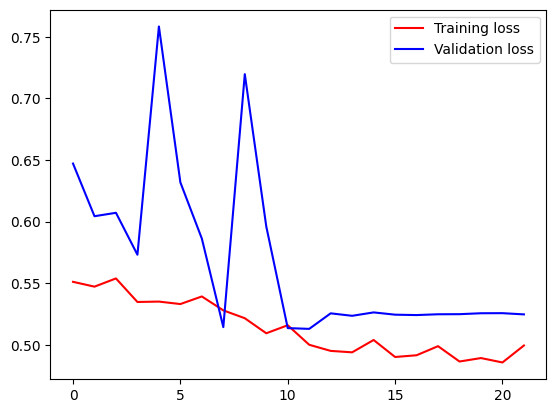

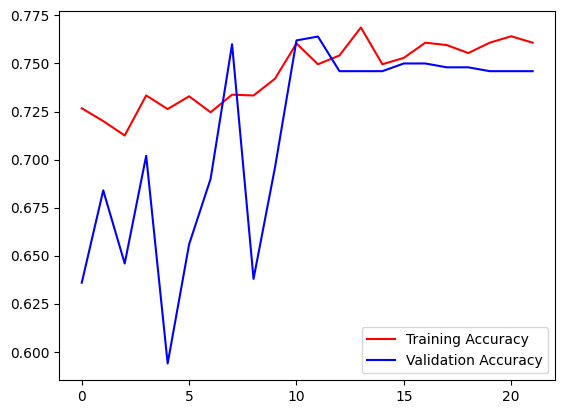

In [104]:
# Val loss cant go up while loss goes up
# the gap between the loss curves simply indicates that the model is learning relationships that do not apply to the validation data.

plt.plot(dog_cat_hist.history['loss'], c='r', label='Training loss')
plt.plot(dog_cat_hist.history['val_loss'], c='b', label='Validation loss')
plt.legend()
plt.show()

#Learning Curves

#Converging Curves: If the training and validation loss curves converge, it indicates good generalization.
#Overfitting:       If the validation loss starts to increase while the training loss continues to decrease, it indicates overfitting.
#Underfitting:      If both curves remain high and do not decrease significantly, it indicates underfitting.

plt.plot(dog_cat_hist.history['accuracy'], c='r', label='Training Accuracy')
plt.plot(dog_cat_hist.history['val_accuracy'], c='b', label='Validation Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 177ms/step


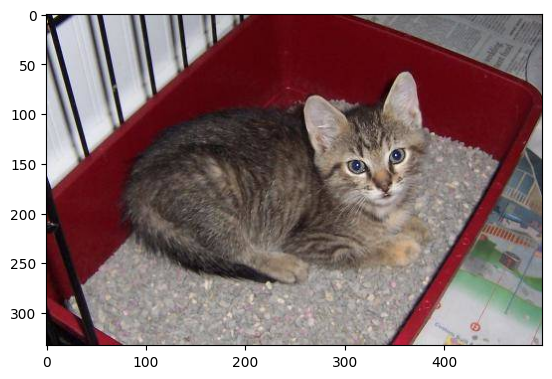

cat
1/1 [==============================] - 0s 48ms/step


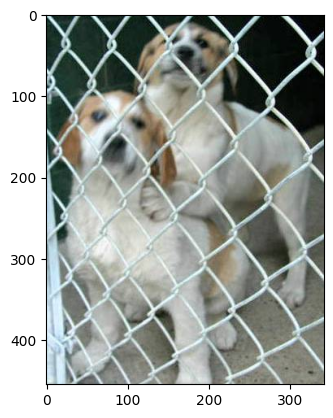

dog
1/1 [==============================] - 0s 46ms/step


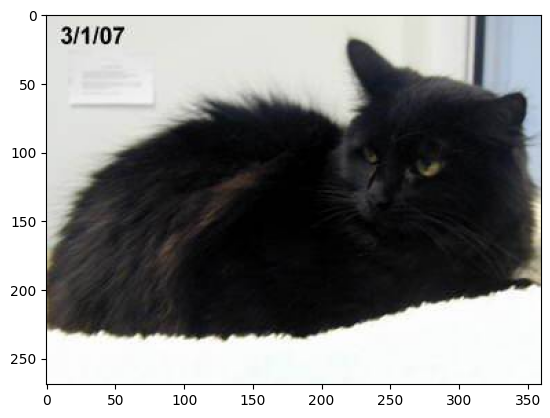

cat
1/1 [==============================] - 0s 35ms/step


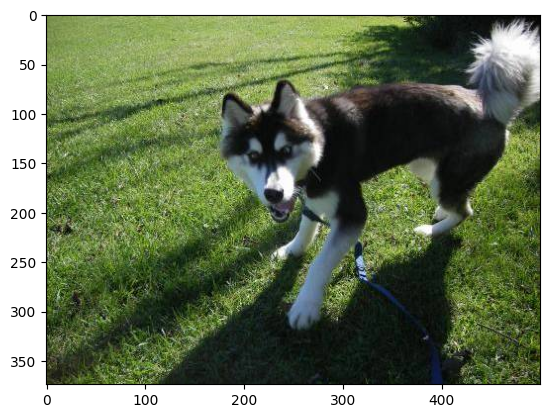

dog


In [72]:
def classifyimage(imagepath,model):
    test_image = load_img(imagepath, target_size = (64, 64))
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] > 0.5:
        prediction = 'dog'
    else:
        prediction = 'cat'

    img = mpimg.imread(imagepath)
    plt.imshow(img)
    plt.show()
    print(prediction)

classifyimage('data/catdog/cat_or_dog_1.jpg',dog_cat_model)
classifyimage('data/catdog/cat_or_dog_2.jpg',dog_cat_model)
classifyimage('data/catdog/cat_or_dog_3.jpg',dog_cat_model)
classifyimage('data/catdog/cat_or_dog_4.jpg',dog_cat_model)

## Reflection


In [ ]:
#https://github.com/alicevision/Meshroom

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

key = { 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot" }



In [22]:

def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

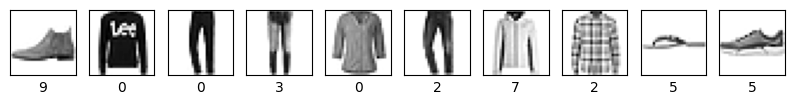

In [23]:
plot_images(X_test, y_train)

In [24]:
# check is padding is required , since not integer we do have to pad
print((28 - 3 / 2) + 1)

27.5


In [26]:
def fashion_model():

    fashion_model = Sequential()

    # instance vgg model layer
    fashion_model.add(Input(shape=(28, 28, 1)))  # input 28x28 image with 1 layers
    fashion_model.add(Rescaling(1./255))

    fashion_model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_uniform', strides=2,  padding = 'same'))
    fashion_model.add(BatchNormalization()) # this is added to stop overfitting
    fashion_model.add(Activation('relu'))   # I want the activation to happen after 'BatchNormalization'
    fashion_model.add(MaxPooling2D(pool_size=3, strides=2))

    fashion_model.add(Flatten())
    fashion_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    fashion_model.add(Dropout(0.5)) #dog_cat_model.add(LayerNormalization()) # this makes a big diff than dog_cat_model.add(Dropout(0.5))
    fashion_model.add(Dense(1, activation='sigmoid'))

    fashion_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return fashion_model

In [ ]:
fashion_model = fashion_model()

fashion_hist = fashion_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    verbose=1,
)


_, acc = fashion_hist.evaluate(X_test, y_test)
print('Accuracy: > %.3f' % (acc * 100.0))

Epoch 1/20


In [122]:
import tensorflow as tf
devices = tf.config.list_physical_devices()
print("\nDevices: ", devices)

gpus = tf.config.list_physical_devices('GPU')
if gpus:
  details = tf.config.experimental.get_device_details(gpus[0])
  print("GPU details: ", details)


Devices:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
